## The use of API in getting weather information from cities around the world 
Here I will be using the API from the Weather Center to get information on the current weather situation in diffrent cities and also put that information in the pandas DataFrame for easy refrence.
The cities are majorly cities in Nigeria -- West Africa; And the metric used is the Celsius  

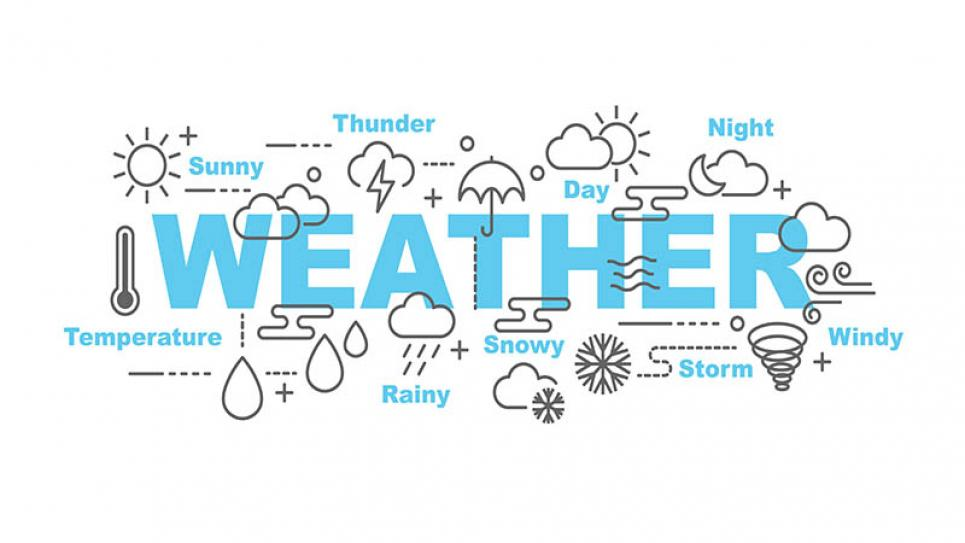

In [1]:
from IPython.display import Image, display
display(Image(filename = 'weda.jpg', embed = True))

In [2]:
# Importing the relevant libraries
import json
import pandas as pd
import requests as req

### I will be making use of the Open weather map API in doing this work 

In [3]:
# calling the base url 
base_url = "http://api.openweathermap.org/data/2.5/weather"

# API key :
key = "c703c966f9be8a0c4869b86832a0898f" 

# getting my queries ready :
query_city = 'Abuja'
query_units = "metric"

query_url = base_url + "?apikey=" + key + '&q=' + query_city + '&units=' + query_units

In [4]:
# checking the full url :
query_url

'http://api.openweathermap.org/data/2.5/weather?apikey=c703c966f9be8a0c4869b86832a0898f&q=Abuja&units=metric'

In [5]:
# To get the response from the api i will use the get method

response = req.get(query_url)
response

<Response [200]>

In [6]:
# Converting it to json format 
# Calling the .json() method 

response = response.json()
response

{'coord': {'lon': 7.49, 'lat': 9.06},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'model',
 'main': {'temp': 34.24,
  'feels_like': 32.71,
  'temp_min': 34.24,
  'temp_max': 34.24,
  'pressure': 1008,
  'humidity': 16,
  'sea_level': 1008,
  'grnd_level': 954},
 'wind': {'speed': 0.52, 'deg': 172},
 'clouds': {'all': 21},
 'dt': 1576250092,
 'sys': {'country': 'NG', 'sunrise': 1576215365, 'sunset': 1576257131},
 'timezone': 3600,
 'id': 2352778,
 'name': 'Abuja',
 'cod': 200}

## presenting it clearly 


In [7]:
# Using json.dumps() allows you to easily read the response output
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "model",
    "clouds": {
        "all": 21
    },
    "cod": 200,
    "coord": {
        "lat": 9.06,
        "lon": 7.49
    },
    "dt": 1576250092,
    "id": 2352778,
    "main": {
        "feels_like": 32.71,
        "grnd_level": 954,
        "humidity": 16,
        "pressure": 1008,
        "sea_level": 1008,
        "temp": 34.24,
        "temp_max": 34.24,
        "temp_min": 34.24
    },
    "name": "Abuja",
    "sys": {
        "country": "NG",
        "sunrise": 1576215365,
        "sunset": 1576257131
    },
    "timezone": 3600,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02d",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 172,
        "speed": 0.52
    }
}


## Prsenting it in a readable format 

In [8]:
# Etract the name of the city:
city_name = response['name']
print('The name of this City is ' + city_name)

# Extracting the city Temperature
city_temp = response['main']['temp']
print('The temperature of ', city_name, ' is ', city_temp,'C')

# Etracting the maximun temperature
max_temp = response['main']['temp_max']
print('The Maximum temperature of ', city_name, ' will be ', max_temp,'C')

# Extract the weather description from our JSON Response
weather_description = response['weather'][0]['description']
print ("The City of "+ city_name, 'will have ' + weather_description)


The name of this City is Abuja
The temperature of  Abuja  is  34.24 C
The Maximum temperature of  Abuja  will be  34.24 C
The City of Abuja will have few clouds


## Creating for multiple cities 

In [9]:
# C. Create an empty list to store our JSON response objects
weather_data = []

# List of cities to query their weather 
cities = ['Abuja', 'Lagos', 'Enugu', 'Ibadan', 'Kano', 'London', 'Hong Kong', 'Awka', 'Uyo' ]

for city in cities:
    query_url = base_url + '?apikey=' + key + '&q=' + city + '&units=' + query_units
    weather_data.append(req.get(query_url).json())
    

In [10]:
weather_data

[{'coord': {'lon': 7.49, 'lat': 9.06},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02d'}],
  'base': 'model',
  'main': {'temp': 34.24,
   'feels_like': 32.71,
   'temp_min': 34.24,
   'temp_max': 34.24,
   'pressure': 1008,
   'humidity': 16,
   'sea_level': 1008,
   'grnd_level': 954},
  'wind': {'speed': 0.52, 'deg': 172},
  'clouds': {'all': 21},
  'dt': 1576250092,
  'sys': {'country': 'NG', 'sunrise': 1576215365, 'sunset': 1576257131},
  'timezone': 3600,
  'id': 2352778,
  'name': 'Abuja',
  'cod': 200},
 {'coord': {'lon': 3.39, 'lat': 6.46},
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}],
  'base': 'stations',
  'main': {'temp': 30,
   'feels_like': 34.5,
   'temp_min': 30,
   'temp_max': 30,
   'pressure': 1011,
   'humidity': 79},
  'visibility': 6000,
  'wind': {'speed': 3.6, 'deg': 220},
  'clouds': {'all': 40},
  'dt': 1576249809,
  'sys': {'type': 1,
   'id': 1185

### Making a Forloop to show the cities 

In [11]:
# Creating empty list:
city_name = []
city_temp = []
max_temp = []
weather_description = []

# making the for loop

for data in weather_data:
    city_name.append(data['name'])
    city_temp.append(data['main']['temp'])
    max_temp.append(data['main']['temp_max'])
    weather_description.append(data['weather'][0]['description'])
    
# Printing all out
print('The name of this City is ' + str(city_name))
print('The temperature of ', city_name, ' is ', city_temp,'C')
print('The Maximum temperature of ', city_name, 'will be ', max_temp,'C')
print ("The City of "+ str(city_name), 'will have ' + str(weather_description), '\n')

The name of this City is ['Abuja', 'Lagos', 'Enugu', 'Ibadan', 'Kano', 'London', 'Hong Kong', 'Awka', 'Uyo']
The temperature of  ['Abuja', 'Lagos', 'Enugu', 'Ibadan', 'Kano', 'London', 'Hong Kong', 'Awka', 'Uyo']  is  [34.24, 30, 32.68, 34.31, 28, 7.55, 17.98, 33.9, 35.18] C
The Maximum temperature of  ['Abuja', 'Lagos', 'Enugu', 'Ibadan', 'Kano', 'London', 'Hong Kong', 'Awka', 'Uyo'] will be  [34.24, 30, 32.68, 34.31, 28, 8.33, 20.56, 33.9, 35.18] C
The City of ['Abuja', 'Lagos', 'Enugu', 'Ibadan', 'Kano', 'London', 'Hong Kong', 'Awka', 'Uyo'] will have ['few clouds', 'scattered clouds', 'overcast clouds', 'clear sky', 'overcast clouds', 'scattered clouds', 'clear sky', 'broken clouds', 'clear sky'] 



### Converting to a dictionary 

In [12]:
weather_data = {'City Name' : city_name,
                'City Temperature in C': city_temp,
               'Maximum Temperature in C ': max_temp,
               'Weather Description ': weather_description}

In [13]:
weather_data

{'City Name': ['Abuja',
  'Lagos',
  'Enugu',
  'Ibadan',
  'Kano',
  'London',
  'Hong Kong',
  'Awka',
  'Uyo'],
 'City Temperature in C': [34.24,
  30,
  32.68,
  34.31,
  28,
  7.55,
  17.98,
  33.9,
  35.18],
 'Maximum Temperature in C ': [34.24,
  30,
  32.68,
  34.31,
  28,
  8.33,
  20.56,
  33.9,
  35.18],
 'Weather Description ': ['few clouds',
  'scattered clouds',
  'overcast clouds',
  'clear sky',
  'overcast clouds',
  'scattered clouds',
  'clear sky',
  'broken clouds',
  'clear sky']}

### Storing in Pandas DATAFRAME

In [14]:
# Converting the above dictionary data to Pandas Dataframe 

weather_data = pd.DataFrame(weather_data)#.reset_index()
weather_data

,City Name,City Temperature in C,Maximum Temperature in C,Weather Description
0,Abuja,34.24,34.24,few clouds
1,Lagos,30.00,30.00,scattered clouds
2,Enugu,32.68,32.68,overcast clouds
3,Ibadan,34.31,34.31,clear sky
4,Kano,28.00,28.00,overcast clouds
5,London,7.55,8.33,scattered clouds
6,Hong Kong,17.98,20.56,clear sky
7,Awka,33.90,33.90,broken clouds
8,Uyo,35.18,35.18,clear sky
